# NLPipe - Data Walkthrough (simple)
<p>#TODO: Needs description of what this file is</p>

# Initialize environment

In [1]:
import sys
import os

PROJECT_DIR = f'{os.getcwd()}'
DEMO_DATA_DIR = f'{os.getcwd()}/data'
DEMO_DATA_FILE = f'{DEMO_DATA_DIR}/IMDB Dataset.csv.gz'
UTILITIES_DIR = f'{PROJECT_DIR}/utilities'

# Add the UTILITY_DIR to the path to import files
sys.path.append(UTILITIES_DIR)

In [2]:
import pandas as pd

# Load Data
<p>Loading the IMDB Dataset<br>
50,000 records on pos/neg sentiment analysis<br>
25,000 records per class<br>

In [3]:
# Loading the IMDB Dataset
ORIG_DF = pd.read_csv(DEMO_DATA_FILE, compression='gzip')
print(f'Data shape: {ORIG_DF.shape}')
display(ORIG_DF.head())

Data shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Setting up variables for later usage in DataPackage
DATA_COLUMN = 'review'
TARGET_COLUMN = 'sentiment'
UNIQUE_COLUMN = None   # Unique index column. If None, one will be created

# DataPackageParams
<p>#TODO: Needs description of what DataPackageParams is</p>

In [5]:
# DataPackageParams are optional. Can do it manually or store and save the params for re-run
from DataPackage import DataPackageParams
myDPP = DataPackageParams(
                    process_params=True, # True=run all data cleanup/setup on load
                    
                    # Class Balance
                    sample_size = None, # Can be set to an absolute value. None means undersample to smallest
                                        
                    # Text Cleaning Params
                    fix_unicode=True,  # fix various unicode errors
                    to_ascii=True,  # transliterate to closest ASCII representation
                    lower=True,  # lowercase text
                    no_line_breaks=False,  # fully strip line breaks as opposed to only normalizing them
                    no_urls=False,  # replace all URLs with a special token
                    no_emails=False,  # replace all email addresses with a special token
                    no_phone_numbers=False,  # replace all phone numbers with a special token
                    no_numbers=False,  # replace all numbers with a special token
                    no_digits=False,  # replace all digits with a special token
                    no_currency_symbols=False,  # replace all currency symbols with a special token
                    no_punct=False,  # remove punctuations
                    replace_with_punct="",  # instead of removing punctuations you may replace them
                    replace_with_url="<URL>",
                    replace_with_email="<EMAIL>",
                    replace_with_phone_number="<PHONE>",
                    replace_with_number="<NUMBER>",
                    replace_with_digit="0",
                    replace_with_currency_symbol="<CUR>",
                    lang="en",  # set to 'de' for German special handling

                    # Remove stopwords
                    remove_stopwords=True, # Removes stopwords
                    stopword_language='english',
        
                    # train test split params
                    stratifyColumn=None, # If None will be autoset to target_column in DataPackage
                    train_size=0.8, # Can be percent or absolute number
                    random_state=765,
                    shuffle=True,

                    # Encoding params
                    encoding_type='TFIDF', # Currently only supports TFIDF encoding, TBA: BERT, GLOVE, Word2Vec
                    max_features=100 # Currently only used in TFIDF
                    )

# Data Package
<p>#TODO: Needs description of what this file is</p>

Params loaded. Process set to True.
Processing Data Package
DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Original Data:
---> original data shape: (50000, 3)
Working Data:
---> working data shape: (50000, 3)
Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False
Data:
---> isOrigDataLoaded: True
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

Processing data package with provided parameters


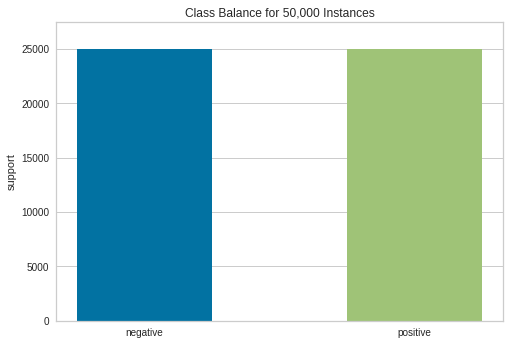

Undersampling data to match min class: negative of size: 25000


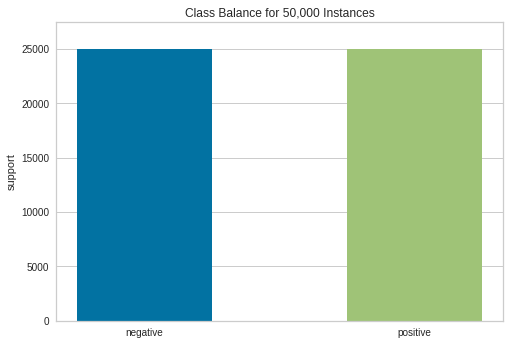

,sentiment,ttlCol
0,negative,25000
1,positive,25000


Cleaning text column...


100%|███████████████████████████████████| 50000/50000 [00:18<00:00, 2763.02it/s]
[nltk_data] Downloading package stopwords to /home/magni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing stopwords...


100%|███████████████████████████████████| 50000/50000 [00:09<00:00, 5320.61it/s]



Encoding to TF-IDF with max_features=100
Encoding completed. Feature list:
['10', 'acting', 'actors', 'actually', 'all', 'also', 'and', 'another', 'around', 'back', 'bad', 'best', 'better', 'big', 'br', 'can', 'cast', 'character', 'characters', 'could', 'director', 'end', 'even', 'ever', 'every', 'film', 'films', 'find', 'first', 'funny', 'get', 'go', 'going', 'good', 'great', 'he', 'horror', 'however', 'in', 'it', 'know', 'life', 'like', 'little', 'look', 'lot', 'love', 'made', 'make', 'makes', 'man', 'many', 'movie', 'movies', 'much', 'never', 'new', 'nothing', 'old', 'one', 'part', 'people', 'plot', 'pretty', 'quite', 'real', 'really', 'say', 'scene', 'scenes', 'see', 'seems', 'seen', 'show', 'something', 'still', 'story', 'take', 'that', 'the', 'there', 'thing', 'things', 'think', 'this', 'though', 'time', 'two', 'us', 've', 'want', 'watch', 'watching', 'way', 'well', 'work', 'world', 'would', 'years', 'young']

Completed train/test split (train_size = 0.8):
---> Original data siz

In [6]:
# Create the DataPackage
from DataPackage import DataPackage
myDP = DataPackage(original_data = ORIG_DF,
                   data_column = DATA_COLUMN,
                   target_column = TARGET_COLUMN,
                   unique_column = UNIQUE_COLUMN,
                   data_package_params = myDPP)

# Persistence - DataProcessingParams and DataPackage
<p>#TODO: Needs description of what persistence is for</p>

In [7]:
# Save DataPackageParams for later use

filename_params = f'{PROJECT_DIR}/testDataProcParams.pkl.gz'
myDPP.save(filename_params)

Saving file as /home/magni/ML_Root/project_root/magritte/testDataProcParams.pkl.gz


In [8]:
# Recover saved DataPackageParams

recoveredDPP = DataPackageParams.load(filename_params)
print(recoveredDPP.process_params)

True


In [9]:
# Save DataPackage for later use

filename_datapackage = f'{PROJECT_DIR}/testDataPackage.pkl.gz'
myDP.save(filename_datapackage)

Saving file as /home/magni/ML_Root/project_root/magritte/testDataPackage.pkl.gz


In [10]:
# Recover saved DataPackage
recoveredDP =  DataPackage.load(filename_datapackage)
recoveredDP.display()

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Original Data:
---> original data shape: (50000, 3)
Working Data:
---> working data shape: (50000, 102)
Process:
---> isProcessed: True
---> isCleaned: True
---> isStopWorded: True
---> isBalanced: True
---> isEncoded: True
---> isTrainTestSplit: True
Data:
---> isOrigDataLoaded: True
---> isTrainDataLoaded: True
---> isTestDataLoaded: True



# Scratchpad